## DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION 
# #GRIPJAN21
# Author: Kunal Khune
# TASK 2: Prediction using Unsupervised ML
From the given iris dataset, predict the optimum number of clusters and represent it visually.


# Import all the libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

## Import the dataset

In [18]:
#Load & Read the iris dataset 
df = pd.read_csv('C:\\Users\\User\\Desktop\\task\\Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [54]:
#Here we print all the information of iris dataset
df.info()
x = iris_df.iloc[:, [0, 1, 2, 3]].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
#Lets describe the species of our dataset
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Data Visualization


Text(0, 0.5, 'Sepal width')

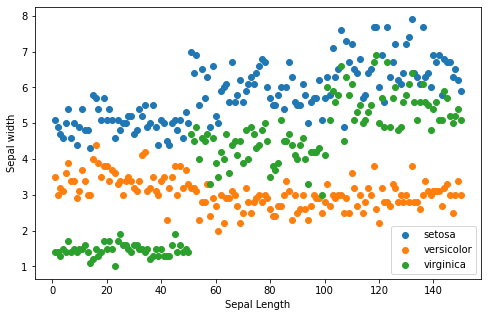

In [63]:
fig = plt.figure(figsize=(8,5))

plt.scatter(x = df.Id, y = df.SepalLengthCm, label='setosa')
plt.scatter(x = df.Id, y = df.SepalWidthCm,  label='versicolor')
plt.scatter(x = df.Id, y = df.PetalLengthCm, label='virginica')
plt.legend(loc='lower right')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')


## Finding the optimum number of clusters

In [64]:
# Calculating the within-cluster sum of square
df = pd.DataFrame(df)
iris_df = df.drop(columns= ['Species' ,'Id'] )

within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    # inertia method returns wcss for that model
    within_cluster_sum_of_square.append(km.inertia_)

## Using Elbow graph to find optimum no. of Clusters

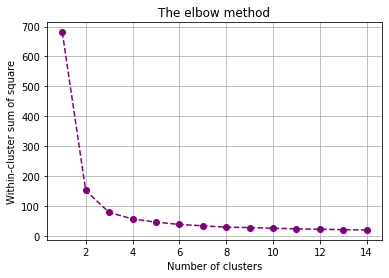

In [65]:
# Plotting the "within-cluster sum of square" 
plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='purple')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

## Creating the K-Means classifier

In [66]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_pred = kmeans.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Visualizing the clusters of sepal length and width

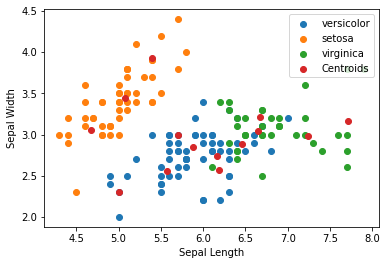

In [67]:

plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], label = 'versicolor')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], label = 'setosa')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], label = 'virginica')

# Plotting the centroids.

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], label = 'Centroids')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

## Visualizing the clusters of petal length and width

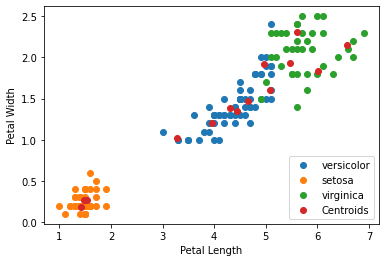

In [68]:
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], label = 'versicolor')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], label = 'setosa')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3], label = 'virginica')

# Plotting the centroids. This time we're going to use the cluster centres 

plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], label = 'Centroids')
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


## Therefore, Task 2 is complete
## Thank you !!
